# Introduction

We'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

<img src="https://i.imgur.com/49FNOHj.jpg">

## Import Statements

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

How many different colours does the LEGO company produce?

In [171]:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [172]:
colors['name'].nunique()

135

The number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [173]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## Understanding LEGO Themes vs. LEGO Sets

All LEGO products are organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [174]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [175]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


1. In which year were the first LEGO sets released and what were these sets called?

In [176]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


2. How many different sets did LEGO sell in their first year?

In [177]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


3. The top 5 LEGO sets with the most number of parts. 

In [178]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


4. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [179]:
sets_by_year = sets.groupby('year').count()
(sets_by_year['set_num'])

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

# Data Visuzlization

## Number of LEGO releases.
*Note that the .csv file is from late 2020, so to plot the full calendar years, we will have to exclude the 2020 and 2021 data records from the dataset.*

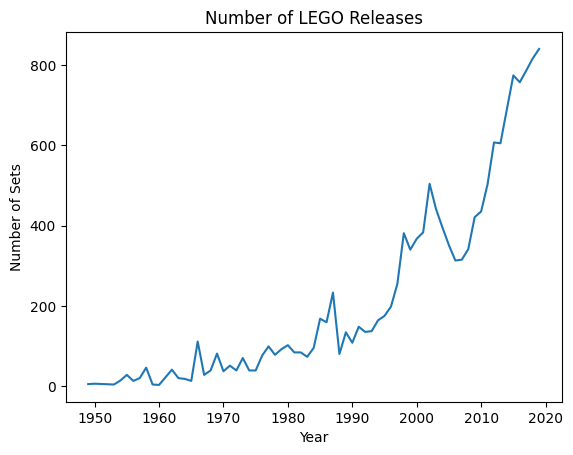

In [180]:
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Releases')
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

## Number of LEGO themes

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [181]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True) 
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


The number of themes released by year on a line chart. (excluding 2020 and 2021). 

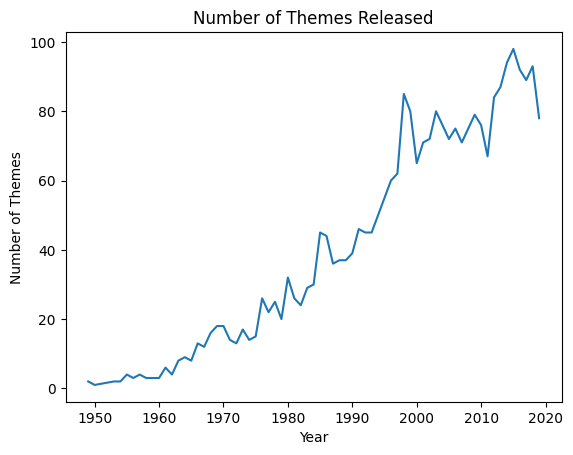

In [182]:
plt.xlabel('Year')
plt.ylabel('Number of Themes')
plt.title('Number of Themes Released')
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

## Analysing number of sets released along with the themes

Text(0, 0.5, 'Number of Themes')

<Figure size 1400x800 with 0 Axes>

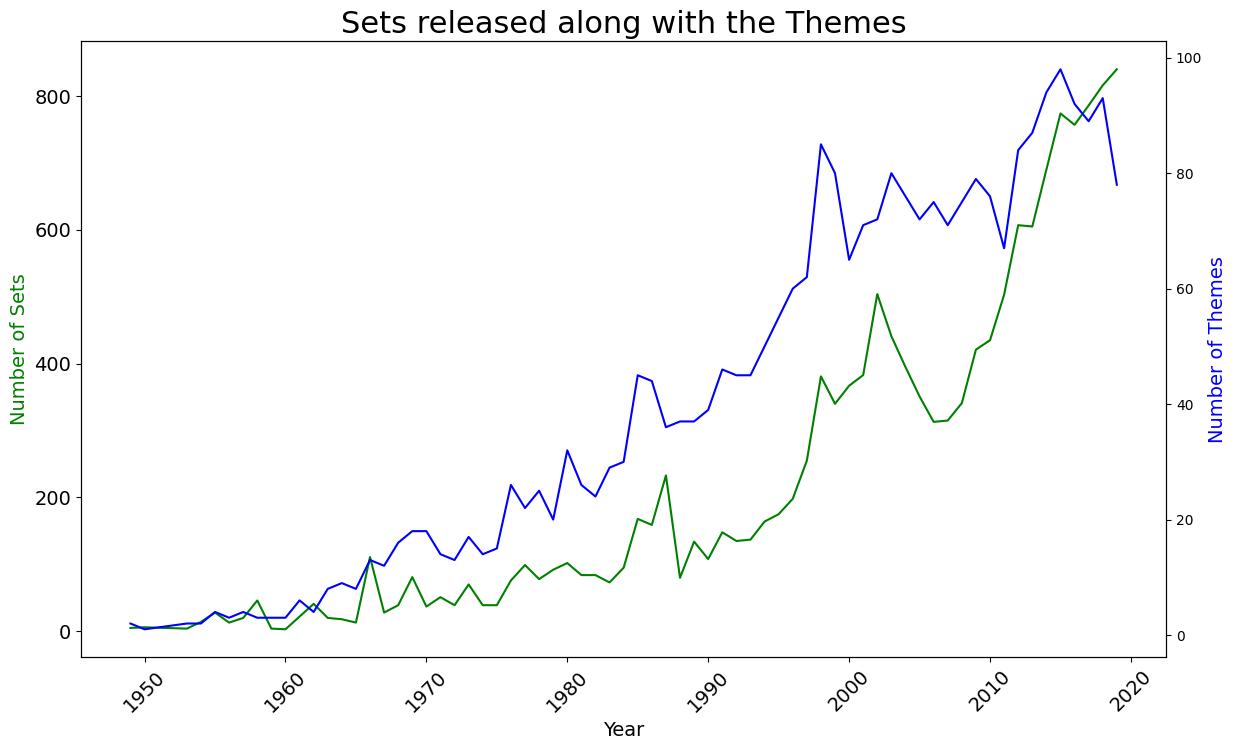

In [212]:
plt.figure(figsize=(14,8))
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Sets released along with the Themes", fontsize=22)


ax1 = plt.gca()
ax2 = ax1.twinx()

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Sets', color='green', fontsize=14)
ax2.set_ylabel('Number of Themes', color='blue', fontsize=14)

1. How many parts did the average LEGO set released in 1954 compared to 2019?

In [206]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
display(parts_per_set)
print(f"1954: {parts_per_set.loc[1954].num_parts:.2f} Numbers on avg\n2019: {parts_per_set.loc[2019].num_parts:.2f} Numbers on avg")

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


1954: 12.36 Numbers on avg
2019: 207.51 Numbers on avg


## Average number of parts over time using a Matplotlib scatter plot.

Has the size and complexity of LEGO sets increased over time based on the number of parts?

<Figure size 1400x800 with 0 Axes>

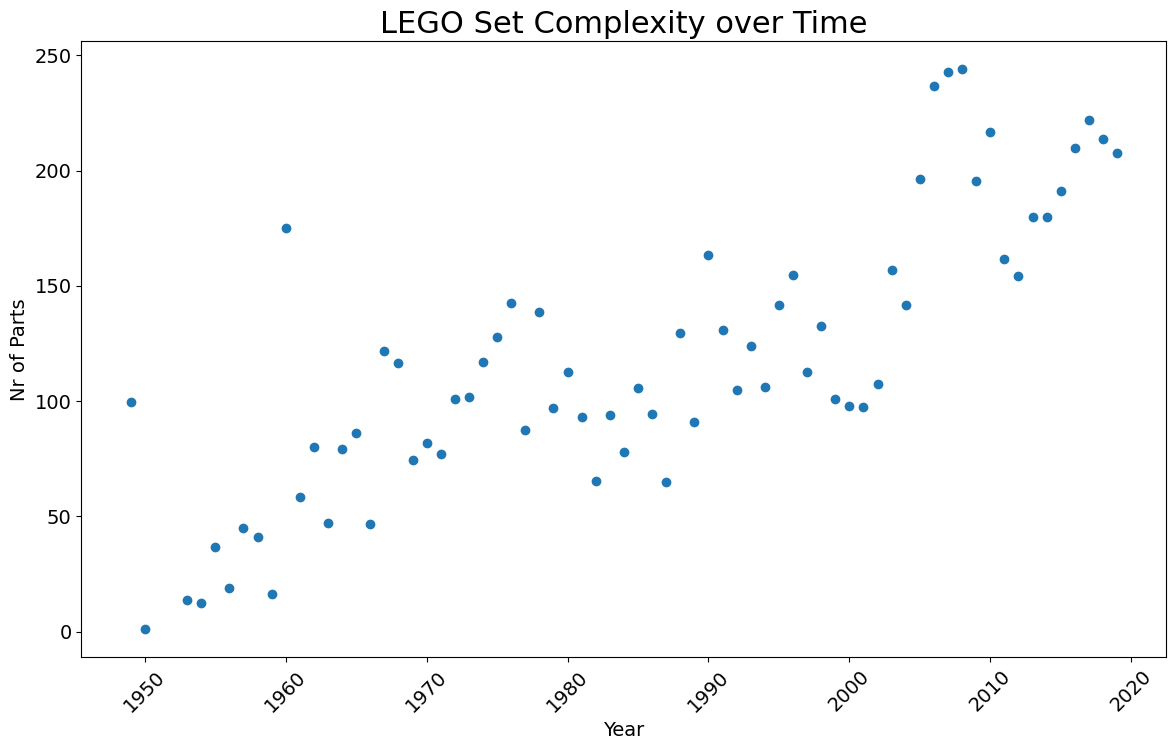

In [197]:
plt.figure(figsize=(14,8))
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Parts', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title("LEGO Set Complexity over Time", fontsize=22)

plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

## Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Let's analyse LEGO's product lines!

In [191]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


*Schema Diagram for LEGO datafiles*
<img src="https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png">

The themes.csv file has the actual theme names. The sets.csv has <code>theme_ids</code> as foreign key which link to the <code>id</code> column in the themes.csv.

In [188]:
themes = pd.read_csv('data/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


## Themes with the most number of sets

In [ ]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

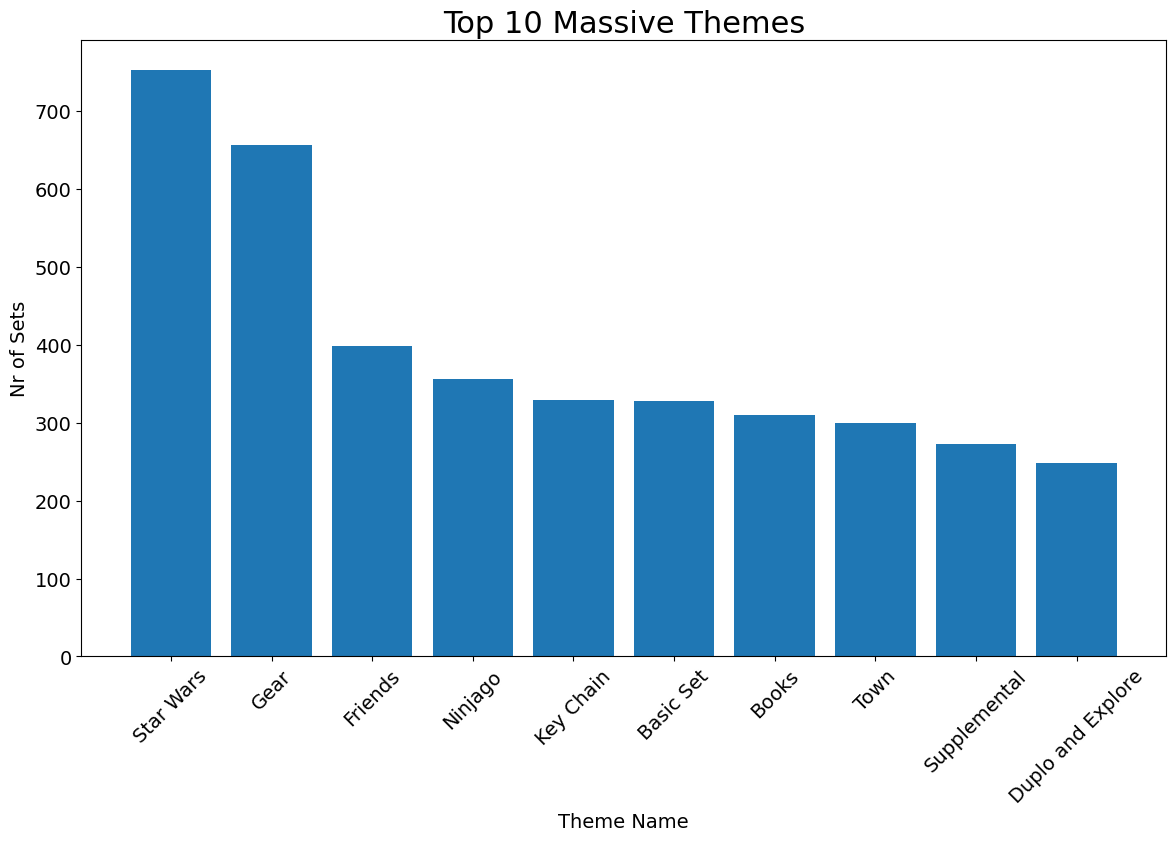

In [194]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.title("Top 10 Massive Themes", fontsize=22)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

